In [78]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2 

from tqdm.notebook import tqdm


from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [85]:
def random_augmentation_img_and_mask(image_directory, mask_directory, n=3):
    img = cv2.imread(image_directory)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    # img = np.expand_dims(img, axis=-1)  # Add channel dimension (assuming grayscale image)

    msk = cv2.imread(mask_directory)
    msk = np.expand_dims(msk, axis=0)  # Add batch dimension
    # msk = np.expand_dims(msk, axis=-1)  # Add channel dimension

    seed = np.random.randint(0, 9999)
    datagen = ImageDataGenerator(
        rotation_range=np.random.randint(0, 180),
        width_shift_range=np.random.uniform(0.0, 0.5),
        height_shift_range=np.random.uniform(0.0, 0.5),
        shear_range=np.random.uniform(0.0, 0.5),
        zoom_range=np.random.uniform(0.0, 0.5),
        horizontal_flip=np.random.choice([True, False]),
        fill_mode='nearest'
    )

    datagen.fit(img, augment=True, seed=seed)
    img_iter = datagen.flow(img, batch_size=1, seed=seed)
    msk_iter = datagen.flow(msk, batch_size=1, seed=seed)

    img_name = image_directory.split('/')[-1].replace('.', '_')
    msk_name = mask_directory.split('/')[-1].replace('.', '_')

    for i in range(n):
        image = next(img_iter)[0].astype('uint8')
        mask = next(msk_iter)[0].astype('uint8')

        plt.imsave('augmentation/Testing/images/' + img_name + "_var" + str(i) + ".tiff", image.squeeze())
        plt.imsave('augmentation/Testing/masks/' + msk_name + "_var" + str(i) + ".png", mask.squeeze())


In [86]:
# ValueError: Input to `.fit()` should have rank 4. Got array with shape: (1, 512, 512, 3, 1)
# ValueError: Input to `.fit()` should have rank 4. Got array with shape: (512, 512, 3)


# Define directories
# base_dir = 'path/to/dataset'
images_dir  = 'Amazon Forest Dataset/data/Test/images'
masks_dir = 'Amazon Forest Dataset/data/Test/masks'


for i in tqdm(range(len(os.listdir(images_dir)))):
    random_augmentation_img_and_mask(images_dir + "/" + os.listdir(images_dir)[i], 
                                 masks_dir + "/" + os.listdir(masks_dir)[i],
                                 n = 3)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Amazon Forest Dataset/data/Test/images'

In [49]:
s = images_dir + "/" + os.listdir(images_dir)[0]
s.split('/')[-1].replace('.', '_')

'Amazon_1110_tiff_25_tiff'

In [25]:
img = cv2.imread(masks_dir + "/" + os.listdir(masks_dir)[0])
img = np.expand_dims(img, axis=0)  

#################################################### Augmented
512
512
512


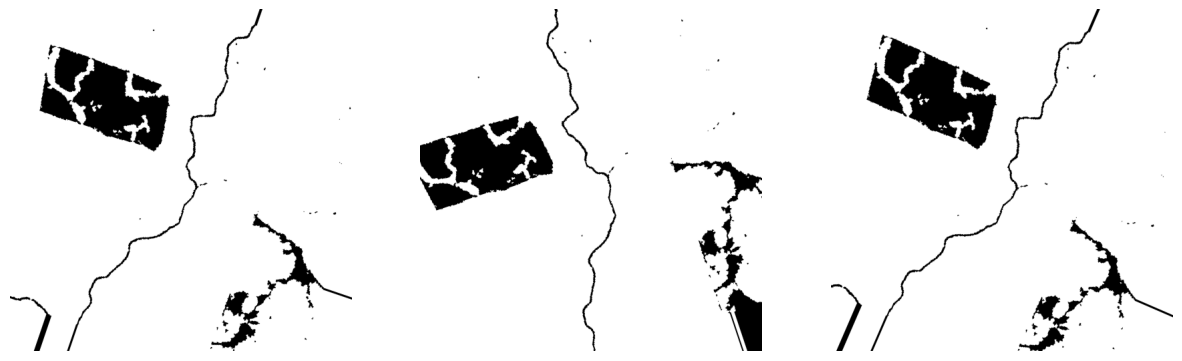

In [46]:
# ImageDataGenerator rotation
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

# iterator
aug_iter = datagen.flow(img, batch_size=1)

print("#################################################### Augmented")
# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')

	print(len(image))
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

	plt.imsave(str(i) + "_variation.jpeg", image)


In [35]:
len(next(aug_iter)[0].astype('uint8')[0])

512

#################################################### ORIGINAL:


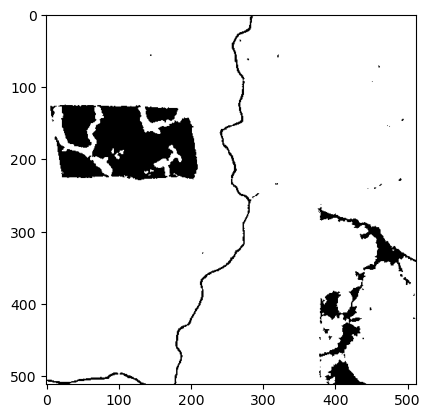

In [27]:
print("#################################################### ORIGINAL:")
plt.imshow(img[0])